This analysis uses the Python programming language and a Google Colab hosted runtime. The popular libraries *scikit-learn*, *seaborn*, and *pandas* are also used.

In [17]:
!python -V

!pip install -U scikit-learn > true
import sklearn
print("scikit-learn", sklearn.__version__)

!pip install -U seaborn > true
import seaborn
print("seaborn", seaborn.__version__)

import pandas
print("pandas", pandas.__version__)

Python 3.10.12
scikit-learn 1.5.2
seaborn 0.13.2
pandas 2.1.4


The data for this analysis comes from the "Superintendent Salary Report by District for School Year 2023-2024"; this is a public dataset released by the Texas Education Agency, and is available online: https://data.texas.gov/dataset/Superintendent-Salary-Report-by-District-for-Schoo/6dh5-cse4.

In [18]:
data = pandas.read_json("https://data.texas.gov/resource/6dh5-cse4.json")
data

,state,region,county,district,district_name,charter_status,superintendent,base_pay,fte_pay,enrollment,fte
0,TX,10,DALLAS COUNTY,57816,A W BROWN LEADERSHIP ACADEMY,OPEN ENROLLMENT CHARTER,"CAGER, SHENIKWA M",111720,111720.0,778,1.0
1,TX,10,DALLAS COUNTY,57829,A+ ACADEMY,OPEN ENROLLMENT CHARTER,"WHITE, BRENTON P",122020,244040.0,1649,0.5
2,TX,4,HARRIS COUNTY,101871,A+ UNLIMITED POTENTIAL,OPEN ENROLLMENT CHARTER,"CASTRO, PAUL DAVID",165468,165468.0,150,1.0
3,TX,12,HILL COUNTY,109901,ABBOTT ISD,TRADITIONAL ISD/CSD,"PUSTEJOVSKY, ERIC D",116133,116133.0,284,1.0
4,TX,17,HALE COUNTY,95901,ABERNATHY ISD,TRADITIONAL ISD/CSD,"WALDRIP, AARON MARK",140190,140190.0,812,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,TX,14,COMANCHE COUNTY,47905,SIDNEY ISD,TRADITIONAL ISD/CSD,"RUCKER, JAMES EDWIN",45000,90000.0,152,0.5
996,TX,19,HUDSPETH COUNTY,115902,SIERRA BLANCA ISD,TRADITIONAL ISD/CSD,"MCGRAW, R LEEANN",100680,100680.0,99,1.0
997,TX,5,HARDIN COUNTY,100904,SILSBEE ISD,TRADITIONAL ISD/CSD,"WEISS, GREGORY WAYNE",177124,177124.0,2654,1.0
998,TX,16,BRISCOE COUNTY,23902,SILVERTON ISD,TRADITIONAL ISD/CSD,"FRANCIS, MICHELLE R",96658,96658.0,223,1.0


The present work compares the performance of three Support Vector Machine algorithms implemented as classes in *scikit-learn*: SVC, NuSVC, and LinearSVC. Binary classification is performed with "charter_status" serving as the labels and "base_pay" and "enrollment" serving as input features. The goal of this analysis is to understand what kinds of patterns are seen between superintendents' salaries and the enrollment at their school districts, both at independent school districts and at open enrollment charter school districts.

First, a scatterplot of the the two input features is generated to understand the distribution of the labeled data.

<Axes: xlabel='enrollment', ylabel='base_pay'>

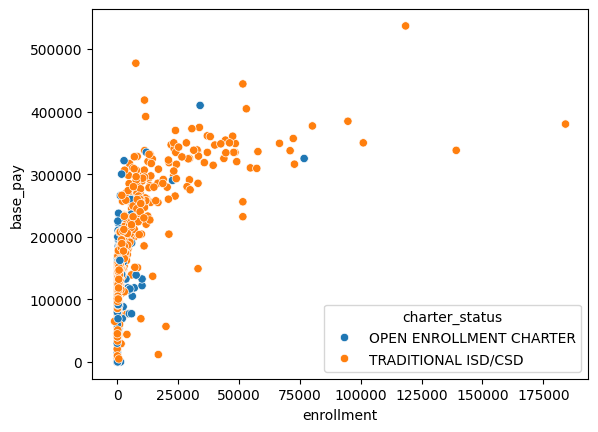

In [19]:
seaborn.scatterplot(data=data, x="enrollment", y="base_pay", hue="charter_status")

Each dot on the plot above represents a superintendent in Texas. Interpreting this scatter plot requires information from the dataset's website:

* **"charter_status"** identifies whether the district is an independent school district or an open enrollment charter school district. This is in reference to the school district that each superintendent belongs to.
* **"base_pay"** reports each superintendent's total payroll amount for the year.
* **"enrollment"** indicates the total enrollment for the superintendent's school district.

It appears that "base_pay" may experience logarithmic growth in relation to "enrollment". However, it is clear that most of the 1,000 data points are clustered in one group, and data points from both groups are interspersed throughout. Using Support Vector Machine algorithms may be able to parse out these differences to accurately predict "charter_status". According to the *scikit-learn* user guide, available at https://scikit-learn.org/stable/modules/svm.html, it is recommended to implement these algorithms with a *scikit-learn* pipeline.



In [20]:
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.svm

pipeline = sklearn.pipeline.make_pipeline(
                sklearn.preprocessing.RobustScaler(),
                sklearn.svm.SVC()
            )
pipeline

Pipeline(steps=[('robustscaler', RobustScaler()), ('svc', SVC())])

The pipeline above first scales the data using *scikit-learn*'s RobustScaler and then applies the SVC class, one of the Support Vector Machine classifiers availble. Before feeding data into the pipeline, the dataset must be split into two parts: one for training the model, and the other for testing the model's accuracy.

In [21]:
import sklearn.model_selection

X = data[["base_pay", "enrollment"]]
y = data["charter_status"]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

print("Number of rows in X_train:", len(X_train))
print("Number of rows in X_test:", len(X_test))
print("Number of rows in y_train:", len(y_train))
print("Number of rows in y_test:", len(y_test))

Number of rows in X_train: 750
Number of rows in X_test: 250
Number of rows in y_train: 750
Number of rows in y_test: 250


Now the pipeline can be used to fit an SVC model and obtain scores for accuracy, precision, and recall.

In [25]:
import sklearn.metrics

pipeline.fit(X_train, y_train)

y_predict = pipeline.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_predict)
precision = sklearn.metrics.precision_score(y_test, y_predict, pos_label='TRADITIONAL ISD/CSD')
recall = sklearn.metrics.recall_score(y_test, y_predict, pos_label='TRADITIONAL ISD/CSD')

print("Accuracy/Precision/Recall:", accuracy, precision, recall)

Accuracy/Precision/Recall: 0.86 0.86 1.0
